<a href="https://colab.research.google.com/github/Polydany0/Digital-Image-Processing/blob/main/LeNetArchitecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import os
import zipfile
import cv2
import numpy as np
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [26]:
# –°–∫–∞—á–∏–≤–∞–Ω–∏–µ –∞—Ä—Ö–∏–≤–∞
!wget https://github.com/GregVial/CoMNIST/raw/master/images/Cyrillic.zip

--2025-01-18 09:26:17--  https://github.com/GregVial/CoMNIST/raw/master/images/Cyrillic.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GregVial/CoMNIST/master/images/Cyrillic.zip [following]
--2025-01-18 09:26:18--  https://raw.githubusercontent.com/GregVial/CoMNIST/master/images/Cyrillic.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71657411 (68M) [application/zip]
Saving to: ‚ÄòCyrillic.zip‚Äô

Cyrillic.zip        100%[===================>]  68.34M   255MB/s    in 0.3s    

2025-01-18 09:26:20 (255 MB/s) - ‚ÄòCyrillic.zip‚Äô saved [71657411/71657411]



In [55]:
# –†–∞—Å–ø–∞–∫–æ–≤–∫–∞ –∞—Ä—Ö–∏–≤–∞
with zipfile.ZipFile('Cyrillic.zip', 'r') as zip_ref:
    zip_ref.extractall('Cyrillic')

In [56]:
# –£–¥–∞–ª–µ–Ω–∏–µ –ø–∞–ø–∫–∏ —Å –±—É–∫–≤–æ–π 'I'
image_dir = 'Cyrillic/Cyrillic'
if os.path.exists(os.path.join(image_dir, 'I')):
    shutil.rmtree(os.path.join(image_dir, 'I'))
    print("–ü–∞–ø–∫–∞ 'I' —É–¥–∞–ª–µ–Ω–∞.")


–ü–∞–ø–∫–∞ 'I' —É–¥–∞–ª–µ–Ω–∞.


In [61]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–æ–∑—Ä–∞—á–Ω—ã—Ö –ø–∏–∫—Å–µ–ª–µ–π –≤ –±–µ–ª—ã–µ
def process_image(image_path, output_path):
    # –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –∞–ª—å—Ñ–∞-–∫–∞–Ω–∞–ª–æ–º
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # –ï—Å–ª–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–º–µ–µ—Ç 4 –∫–∞–Ω–∞–ª–∞ (RGBA), —É–¥–∞–ª—è–µ–º –∞–ª—å—Ñ–∞-–∫–∞–Ω–∞–ª
    if image.shape[2] == 4:
        trans_mask = image[:, :, 3] == 0  # –ú–∞—Å–∫–∞ –¥–ª—è –ø—Ä–æ–∑—Ä–∞—á–Ω—ã—Ö –ø–∏–∫—Å–µ–ª–µ–π
        image[trans_mask] = [255, 255, 255, 255]  # –ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–µ –ø–∏–∫—Å–µ–ª–∏ –Ω–∞ –±–µ–ª—ã–µ
        new_img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ RGB
    else:
        new_img = image  # –ï—Å–ª–∏ –∞–ª—å—Ñ–∞-–∫–∞–Ω–∞–ª–∞ –Ω–µ—Ç, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å

    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    cv2.imwrite(output_path, new_img)

In [62]:
# –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –ø–∞–ø–∫–µ
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —ç–ª–µ–º–µ–Ω—Ç –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–µ–π
    if os.path.isdir(letter_dir):
        for image_name in os.listdir(letter_dir):
            image_path = os.path.join(letter_dir, image_name)

            # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —ç–ª–µ–º–µ–Ω—Ç —Ñ–∞–π–ª–æ–º –∏ –∏–º–µ–µ—Ç –ª–∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ .png
            if os.path.isfile(image_path) and image_name.lower().endswith('.png'):
                # –°–æ–∑–¥–∞–µ–º –ø—É—Ç—å –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
                output_path = os.path.join(letter_dir, image_name)

                # –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
                process_image(image_path, output_path)
                print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: {output_path}")

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58c11316d151c.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58bf1ed8cb8a3.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58bfc46e91dfa.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58c5a7fad9f24.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58b13061ba25d.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58bb4c96a0553.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58c29384d9231.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58bf283f46e67.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58c1ca70e78ae.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrillic/Cyrillic/–ú/58c1ac60e25b5.png
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ: Cyrill

–ü—Ä–æ–≤–µ—Ä–∫–∞... –ü—Ä–æ–≤–µ—Ä–∫–∞...

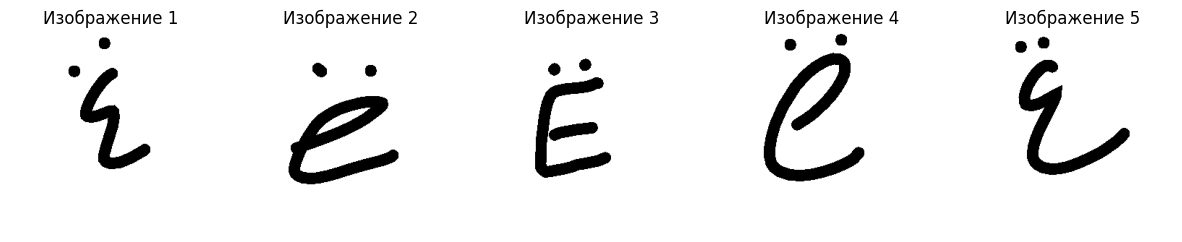

In [64]:
# –ü—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å –±—É–∫–≤–æ–π "–Å"
letter_dir = os.path.join(image_dir, '–Å')

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ –ø–∞–ø–∫–∞ —Å –±—É–∫–≤–æ–π "–Å"
if os.path.exists(letter_dir):
    # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –ø–∞–ø–∫–µ
    image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

    # –í—ã–≤–æ–¥–∏–º –ø–µ—Ä–≤—ã–µ 5 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(image_files))):  # –í—ã–≤–æ–¥–∏–º –Ω–µ –±–æ–ª–µ–µ 5 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        image_path = os.path.join(letter_dir, image_files[i])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # –ó–∞–≥—Ä—É–∂–∞–µ–º –≤ grayscale

        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ {i + 1}")
        plt.axis('off')

    plt.show()
else:
    print("–ü–∞–ø–∫–∞ —Å –±—É–∫–≤–æ–π '–Å' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞.")

In [65]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
letter_counts = {}

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º –ø–∞–ø–∫–∞–º —Å –±—É–∫–≤–∞–º–∏
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —ç–ª–µ–º–µ–Ω—Ç –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–µ–π
    if os.path.isdir(letter_dir):
        # –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤ —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ–º .png
        image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]
        letter_counts[letter] = len(image_files)

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π –±—É–∫–≤—ã
for letter, count in letter_counts.items():
    print(f"–ë—É–∫–≤–∞ '{letter}': {count} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")

–ë—É–∫–≤–∞ '–£': 551 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–•': 486 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–í': 487 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–°': 513 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ñ': 462 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ò': 447 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ï': 576 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–Æ': 461 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–≠': 458 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–†': 493 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–Ø': 438 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ù': 508 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–û': 465 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ô': 466 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–Å': 344 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ì': 424 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–§': 463 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–®': 431 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ü': 474 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–™': 459 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–î': 465 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–ú': 470 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–ë—É–∫–≤–∞ '–´': 415 –∏–∑–æ–±—Ä–

In [66]:
# –ù–∞—Ö–æ–¥–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
min_value = min(letter_counts.values())
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–ª–∞—Å—Å–µ: {min_value}")

–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–ª–∞—Å—Å–µ: 344


In [69]:
# –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
for letter in letter_counts:
    letter_dir = os.path.join(image_dir, letter)

    # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
    image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

    # –ï—Å–ª–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –±–æ–ª—å—à–µ, —á–µ–º min_value, —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ
    if len(image_files) > min_value:
        # –°–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –≤—ã–±–∏—Ä–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è
        files_to_remove = random.sample(image_files, len(image_files) - min_value)

        # –£–¥–∞–ª—è–µ–º –≤—ã–±—Ä–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        for file_name in files_to_remove:
            file_path = os.path.join(letter_dir, file_name)
            os.remove(file_path)
            print(f"–£–¥–∞–ª–µ–Ω–æ: {file_path}")

        print(f"–ë—É–∫–≤–∞ '{letter}': –æ—Å—Ç–∞–≤–ª–µ–Ω–æ {min_value} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
    else:
        print(f"–ë—É–∫–≤–∞ '{letter}': —É–∂–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞ ({len(image_files)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π)")

–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bff5b7ca22b.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58d415e3485fe.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bf29c6d23ce.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bf1cf33a52f.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/5a6734f3a665f.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c11c2f9d4fe.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58befae74ad2a.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bfa968cd6f3.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c7d4474ad0b.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c38a5048301.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58be833ddde23.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c3fab9e3e15.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58be9ed6ab11a.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bee00cce5b4.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c7686491325.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58c2ae483499b.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/58bf195871305.png
–£–¥–∞–ª–µ–Ω–æ: Cyrillic/Cyrillic/–£/59fd484c7af11.png
–£–¥–∞–ª–µ

In [80]:
# –ü—É—Ç–∏ –∫ –ø–∞–ø–∫–∞–º –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
train_dir = 'Cyrillic_train'
valid_dir = 'Cyrillic_valid'
test_dir = 'Cyrillic_test'

# –°–æ–∑–¥–∞–µ–º –ø–∞–ø–∫–∏, –µ—Å–ª–∏ –æ–Ω–∏ –Ω–µ —Å—É—â–µ—Å—Ç–≤—É—é—Ç
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [81]:
# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º –ø–∞–ø–∫–∞–º —Å –±—É–∫–≤–∞–º–∏ –≤ image_dir
for letter in os.listdir(image_dir):
    letter_dir = os.path.join(image_dir, letter)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —ç–ª–µ–º–µ–Ω—Ç –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–µ–π
    if os.path.isdir(letter_dir):
        # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        image_files = [f for f in os.listdir(letter_dir) if f.lower().endswith('.png')]

        # –°–æ–∑–¥–∞–µ–º –ø–∞–ø–∫–∏ –¥–ª—è —Ç–µ–∫—É—â–µ–π –±—É–∫–≤—ã –≤ train, valid –∏ test
        os.makedirs(os.path.join(train_dir, letter), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, letter), exist_ok=True)
        os.makedirs(os.path.join(test_dir, letter), exist_ok=True)

        # –ò–Ω–¥–µ–∫—Å –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è —Ç–µ–∫—É—â–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        index = 0

        # –¶–∏–∫–ª –¥–ª—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        while index < len(image_files):
            # 2 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ Cyrillic_train
            for _ in range(2):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ Cyrillic_test
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(test_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

            # 2 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ Cyrillic_train
            for _ in range(2):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ Cyrillic_valid
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(valid_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

            # 3 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ Cyrillic_train
            for _ in range(3):
                if index < len(image_files):
                    src_path = os.path.join(letter_dir, image_files[index])
                    dst_path = os.path.join(train_dir, letter, image_files[index])
                    shutil.copy(src_path, dst_path)
                    index += 1

            # 1 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ Cyrillic_test
            if index < len(image_files):
                src_path = os.path.join(letter_dir, image_files[index])
                dst_path = os.path.join(test_dir, letter, image_files[index])
                shutil.copy(src_path, dst_path)
                index += 1

        print(f"–ë—É–∫–≤–∞ '{letter}': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.")

–ë—É–∫–≤–∞ '–£': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–•': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–í': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–°': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ñ': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ò': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ï': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–Æ': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–≠': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–†': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–Ø': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ù': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–û': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ô': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–Å': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–ë—É–∫–≤–∞ '–ì': —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–

In [82]:
# –ë—É–∫–≤–∞, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–π –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤
bykva = '–ê'

# –ü—É—Ç–∏ –∫ –ø–∞–ø–∫–∞–º —Å –±—É–∫–≤–æ–π "–ê" –≤ –∫–∞–∂–¥–æ–π –∏–∑ —Ç—Ä—ë—Ö –ø–∞–ø–æ–∫
train_bykva_dir = os.path.join(train_dir, bykva)
valid_bykva_dir = os.path.join(valid_dir, bykva)
test_bykva_dir = os.path.join(test_dir, bykva)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ
def count_files(directory):
    if os.path.exists(directory) and os.path.isdir(directory):
        return len([f for f in os.listdir(directory) if f.lower().endswith('.png')])
    return 0

# –ü–æ–¥—Å—á—ë—Ç —Ñ–∞–π–ª–æ–≤ –≤ –∫–∞–∂–¥–æ–π –ø–∞–ø–∫–µ
train_count = count_files(train_bykva_dir)
valid_count = count_files(valid_bykva_dir)
test_count = count_files(test_bykva_dir)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ '{bykva}':")
print(f"  Cyrillic_train: {train_count} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
print(f"  Cyrillic_valid: {valid_count} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
print(f"  Cyrillic_test: {test_count} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ '–ê':
  Cyrillic_train: 241 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
  Cyrillic_valid: 34 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
  Cyrillic_test: 69 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


–¢–µ–ø–µ—Ä—å –ø–µ—Ä–µ–π–¥–µ–º –∫ —Ç–æ–º—É —Å —á–µ–≥–æ –º—ã –Ω–∞—á–∞–ª–∏ –≤ LeNetArchitecture...

In [84]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [85]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö –∏–∑ –ø–∞–ø–∫–∏
def load_data(directory):
    images = []
    labels = []
    for letter in os.listdir(directory):
        letter_dir = os.path.join(directory, letter)
        if os.path.isdir(letter_dir):
            for image_name in os.listdir(letter_dir):
                image_path = os.path.join(letter_dir, image_name)
                if image_name.lower().endswith('.png'):
                    image = tf.keras.utils.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
                    image = tf.keras.utils.img_to_array(image)
                    images.append(image)
                    labels.append(letter)
    return np.array(images), np.array(labels)

In [86]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
x_train, y_train = load_data(train_dir)
x_valid, y_valid = load_data(valid_dir)
x_test, y_test = load_data(test_dir)

In [87]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ —á–∏—Å–ª–æ–≤–æ–π —Ñ–æ—Ä–º–∞—Ç
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# One Hot Encoding –¥–ª—è –º–µ—Ç–æ–∫
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

–ë–ª–æ–∫ –æ–±—É—á–µ–Ω–∏—è ü¶æü¶æü¶æ

In [108]:
# –û—á–∏—Å—Ç–∫–∞ —Å–µ—Å—Å–∏–∏ Keras –¥–ª—è —Å–±—Ä–æ—Å–∞ —Å–æ—Å—Ç–æ—è–Ω–∏—è
K.clear_session()

In [109]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [111]:
# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
K.clear_session()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
history = model.fit(
    x_train, y_train,  # –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    batch_size=32,    # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    epochs=20,         # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    verbose=1,         # –£—Ä–æ–≤–µ–Ω—å –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–≤–æ–¥–∞
    validation_data=(x_valid, y_valid)  # –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
)

Epoch 1/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 16ms/step - accuracy: 0.1365 - loss: 3.1495 - val_accuracy: 0.5169 - val_loss: 1.7144
Epoch 2/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 28ms/step - accuracy: 0.5388 - loss: 1.5970 - val_accuracy: 0.6622 - val_loss: 1.1531
Epoch 3/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 16ms/step - accuracy: 0.6889 - loss: 1.0223 - val_accuracy: 0.7112 - val_loss: 0.9532
Epoch 4/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 16ms/step - accuracy: 0.7651 - loss: 0.7648 - val_accuracy: 0.7620 - val_loss: 0.8194
Epoch 5/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 23ms/step - accuracy: 0.8083 - loss: 0.6202 - val_accuracy: 0.7879 - val_loss: 0.7275
Epoch 6/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 15ms/step - accuracy: 0.8367 - loss: 0.5175 - val_accuracy: 0.8155 - val

In [113]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {test_acc:.4f}")

72/72 - 0s - 5ms/step - accuracy: 0.8533 - loss: 0.6893
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 0.8533
